# Adatok betöltése és vizualizációja
## **Módszer:** kaggle verseny letöltése a /content mappába, majd kicsomagolás
## **Fontos:** (kb 60GB szükséges átmenetileg) zip mappa törlése a kicsomagolás után, hogy visszakapjunk 30GB-ot!

Authentikáció - itt fel kell tölteni a kaggle.json file-t

In [3]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"horvthbotondtrylvw","key":"809fb1d01438b6e4dc65d2324c14c1f7"}'}

A hitelesítési adatok feltöltése, alkalmazása

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Letöltés a /content mappába

In [5]:
!kaggle competitions download -c airbus-ship-detection -p /content

100% 28.6G/28.6G [06:42<00:00, 119MB/s]
100% 28.6G/28.6G [06:42<00:00, 76.3MB/s]


Kicsomagolás zip formátumból (a zip mappa törlését azután csináltam kézzel, hogy ez befejeződött)

In [6]:
!unzip /content/airbus-ship-detection.zip -d /content/airbus-ship-detection


A streamkimeneten csak az utolsó 5000 sor látható.
  inflating: /content/airbus-ship-detection/train_v2/f9775b70e.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f977a470c.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f9780bfaf.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f9782bdfe.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f9785ca49.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f9785e462.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97a719d5.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97afa376.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97b85e3e.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97bd0b11.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97bd6b80.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97bfb1b2.jpg  
  inflating: /content/airbus-ship-detection/train_v2/f97c8cbbe.jpg  
  inflating: /content/airbus-ship-detection/train_v2

Ellenőrzés, hogy megvannak-e a szükséges elemek

In [7]:
!ls /content/airbus-ship-detection

sample_submission_v2.csv  test_v2  train_ship_segmentations_v2.csv  train_v2


Mintahasználat - 3-3 kép kirajzolása a képekből

Displaying first 3 images from the train_v2 folder:


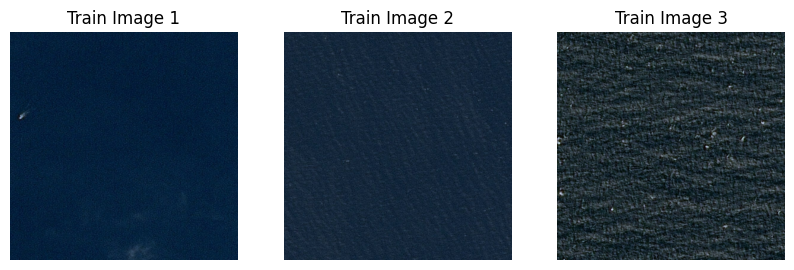

Displaying first 3 images from the test_v2 folder:


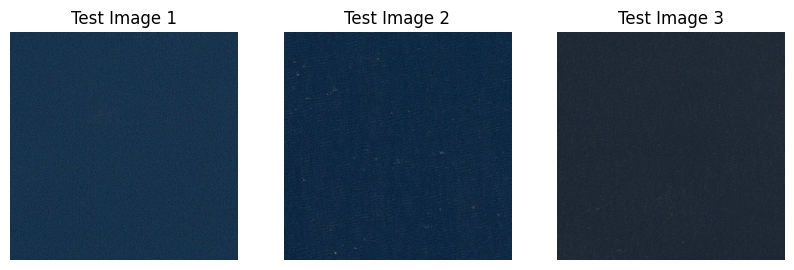

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# path of the train and test folders
train_folder = '/content/airbus-ship-detection/train_v2/'
test_folder = '/content/airbus-ship-detection/test_v2/'

# Get the first 3 image filenames from both train and test directories
train_images = os.listdir(train_folder)[:3]
test_images = os.listdir(test_folder)[:3]

# Function to display images
def show_images(image_folder, image_list, title):
    plt.figure(figsize=(10,5))
    for idx, image_file in enumerate(image_list):
        img_path = os.path.join(image_folder, image_file)
        img = Image.open(img_path)
        plt.subplot(1, 3, idx+1)
        plt.imshow(img)
        plt.title(f'{title} {idx+1}')
        plt.axis('off')  # Turn off axis labels for a cleaner look
    plt.show()

# Show first 3 train images
print("Displaying first 3 images from the train_v2 folder:")
show_images(train_folder, train_images, 'Train Image')

# Show first 3 test images
print("Displaying first 3 images from the test_v2 folder:")
show_images(test_folder, test_images, 'Test Image')


Képek összeszámolása a tanítófájl adatai alapján

In [9]:
import pandas as pd

# Load the annotations file
csv_path = '/content/airbus-ship-detection/train_ship_segmentations_v2.csv'
df = pd.read_csv(csv_path)

# Check for missing annotations
print(f"Number of images without ships: {df['EncodedPixels'].isna().sum()}")
print(f"Number of images with ships: {df['EncodedPixels'].notna().sum()}")

# Show the first few rows of the dataframe
df.head()


Number of images without ships: 150000
Number of images with ships: 81723


,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ImageId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('EncodedPixels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EncodedPixels'].value_counts()
    for x_label, grp in _df_2.groupby('ImageId')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ImageId')
_ = plt.ylabel('EncodedPixels')

Split, shuffle

In [18]:
import random

# Shuffle the dataset (frac=1 means that it will keep all rows)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Determine the sizes for each split
total_images = len(df_shuffled)
train_size = int(0.8 * total_images)  # 80% for training
val_size = int(0.1 * total_images)    # 10% for validation
test_size = total_images - train_size - val_size  # Remaining for test

train_df = df_shuffled[:train_size]          # First 80% for training
val_df = df_shuffled[train_size:train_size + val_size]  # Next 10% for validation
test_df = df_shuffled[train_size + val_size:]  # Last 10% for testing

# Print the size of each set
print(f"Total images: {total_images}")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Total images: 231723
Training set size: 185378
Validation set size: 23172
Test set size: 23173


Check image size

In [19]:
from PIL import Image
img = Image.open(os.path.join(train_folder, train_images[0]))
print(f"Image size: {img.size}")

Image size: (768, 768)


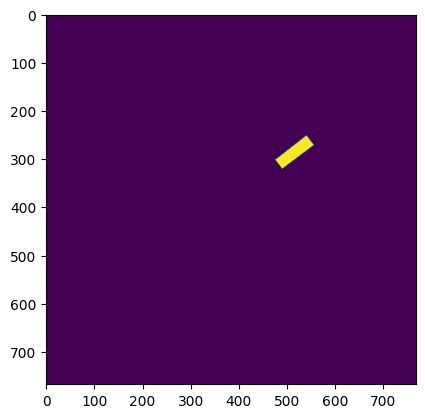

In [20]:
import numpy as np

# Convert RLE to mask
def rle_decode(mask_rle, shape=(768, 768)):
    if pd.isnull(mask_rle):  # Check if the RLE is NaN
        return np.zeros(shape, dtype=np.uint8)  # Return an empty mask if there's no ship

    s = mask_rle.split()  # Split the string into RLE parts
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)

    for start, end in zip(starts, ends):
        img[start:end] = 1

    return img.reshape(shape).T  # Reshape and transpose to get the correct mask orientation

# Test on a single image
mask_rle = df.iloc[30]['EncodedPixels']
mask = rle_decode(mask_rle)
plt.imshow(mask)
plt.show()

Custom dataset class using pytorch

In [21]:
import torch
from torch.utils.data import Dataset


class AirbusShipDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): A dataframe with ImageId and EncodedPixels (ship mask).
            image_dir (str): Directory where the images are stored.
            transform (callable, optional): Optional transform to be applied on the image and mask.
        """
        self.ships_frame = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.ships_frame)

    def __getitem__(self, idx):
        # Get the image name
        img_name = os.path.join(self.image_dir, self.ships_frame.iloc[idx, 0])
        # Load the image using PIL
        image = Image.open(img_name)

        # Get the RLE mask and decode it
        mask_rle = self.ships_frame.iloc[idx, 1]
        mask = rle_decode(mask_rle)

        # Convert image and mask to tensors
        image = np.array(image)
        mask = np.array(mask)

        if self.transform:
            # Apply transformations to both image and mask
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # Change to [C, H, W] format
        mask = torch.from_numpy(mask).float().unsqueeze(0)         # Add channel dimension to mask

        return {'image': image, 'mask': mask}

Adatok letöltése, előkészítése - együtt készített részek

In [ ]:
"""
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from skimage import io


random_seed = 42
np.random.seed(random_seed)


dataset = pd.read_csv('../input/airbus-ship-detection/train_ship_segmentations_v2.csv')


train_split = 0.8
valid_split = 0.1
test_split = 0.1

#esetleg shuffle

#X_train = [;]
X_test =
X_valid =

Y_train =
Y_test =
Y_valid =

class ShipDataset(Dataset):


    def __init__(self, dataframe, image_dir, transform=None):

        self.ships_frame = dataframe
        self.image_dir = image_dir

    def __len__(self):
        return len(self.ships_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.image_dir,
                                self.ships_frame.iloc[idx, 0])
        image = io.imread(img_name)
        ships = self.ships_frame.iloc[idx, 1:]
        ships = convert_to_2d_tensor(ships)
        sample = {'image': image, 'ships': ships}


        return sample

def convert_to_2d_tensor(data):
    # Step 1: Split the string into individual numbers and convert to integers
    numbers = list(map(int, data.split()))

    # Step 2: Reshape the list into pairs (start, length)
    arr = np.array(numbers).reshape(-1, 2)  # Each pair is (start position, length)

    # Step 3: Convert the NumPy array to a PyTorch tensor
    tensor = torch.tensor(arr, dtype=torch.int32)

    return tensor
"""